In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
def gradient_descent(x, lr=1, maxiter=100):
    hist = []
    for i in range(maxiter):
        hist.append(x)
        grad = compute_grad(x)
        x = x - lr * grad
    return hist

def momentum(x, lr=1, rho=.9, maxiter=100):
    hist = []
    v = np.zeros(x.shape)
    for i in range(maxiter):
        hist.append(x)
        grad = compute_grad(x)
        v = rho * v + grad
        x = x - lr * v
    return hist

def rmsprop(x, lr=1, decay=.9, maxiter=100):
    hist = []
    cucum_grad_square = np.zeros(x.shape)
    for i in range(maxiter):
        hist.append(x)
        grad = compute_grad(x)
        cucum_grad_square = cucum_grad_square * decay + (1 - decay) * grad ** 2
        x = x - lr * grad / (np.sqrt(cucum_grad_square) + 1e-8)
    return hist

In [3]:
def f(x):
    # x's shape: (..., num_dim)
    inner = x[..., 0] ** 2 / 4 + x[..., 1] ** 2
    return 1 / (1 + np.exp(-(x[..., 0] ** 2 / 4 + x[..., 1] ** 2)))

def compute_grad(x):
    # x's shape: (..., num_dim)
    outer = f(x) * (1 - f(x))
    return np.stack((x[..., 0] / 2 * outer, 2 * x[..., 1] * outer), axis=-1)

def plot_countour():
    n = 1000
    x = np.linspace(-2, 2, n)
    y = np.linspace(-2, 2, n)
    grid_x, grid_y = np.meshgrid(x, y)
    data = np.stack((grid_x, grid_y), axis=-1)
    plt.contourf(grid_x, grid_y, f(data), 15, alpha=.75, cmap=plt.cm.hot)
    plt.contour(grid_x, grid_y, f(data), 15, colors='black')

In [4]:
choices = [
    dict(name="gd", optimizer=gradient_descent, hist_x=None, hist_y=None),
    dict(name="momentum", optimizer=momentum, hist_x=None, hist_y=None),
    dict(name="rmsprop", optimizer=rmsprop, hist_x=None, hist_y=None),
]
x = np.array([-1, -1])
for choice in choices:
    choice["hist_x"], choice["hist_y"] = tuple(np.hsplit(np.array(choice["optimizer"](x, lr=1e-1, maxiter=50)), 2))

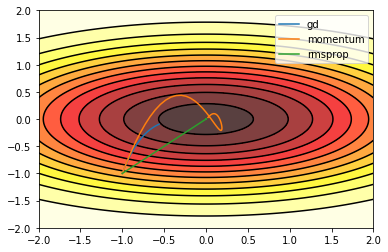

In [5]:
plot_countour()
for choice in choices:
    plt.plot(choice["hist_x"], choice["hist_y"], label=choice["name"])
plt.legend(loc="best")
plt.show()